In [2]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

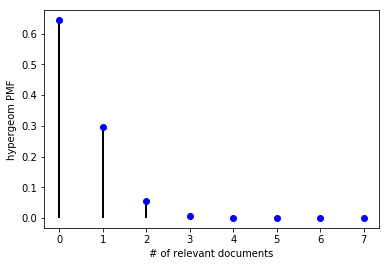

In [2]:
# M is the total number of objects, n is total number of Type I objects.
# The random variate represents the number of Type I objects in N draws without replacement from the total population.

[M, n, N] = [200, 7, 12]
rv = hypergeom(M, n, N)

x = np.arange(0, n+1)
pmf_array = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_array, 'bo')
ax.vlines(x, 0, pmf_array, lw=2)
ax.set_xlabel('# of relevant documents')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [3]:
mini, maxi = rv.interval(0.95)
mini = int(mini)
maxi = int(maxi)
print(mini)
print(maxi)

0
2


In [4]:
print(sum(pmf_array))
print(sum(pmf_array[mini:maxi+1]))
print(sum(pmf_array[0:mini]))
print(sum(pmf_array[maxi+1:]))

1.0000000000001432
0.9949022874484187
0
0.005097712551724615


In [5]:
x = np.arange(0, n+1)

for i in range(100):
    M = 300
    n = i
    N = 30
    rv = hypergeom(M, n, N)
    pmf_array = rv.pmf(x)
    
    mini, maxi = rv.interval(0.9)
    #print(int(mini), sum(pmf_array[0:int(mini)+1]))
    #print()
    if mini != rv.isf(0.95):
        print(mini, rv.isf(0.05))
    if maxi != rv.isf(0.05):
        print(maxi, rv.isf(0.95))

interval produces the same outcomes as ppm(1 - (1 - alpha)/2) or isf() with the respective alphas

200
200


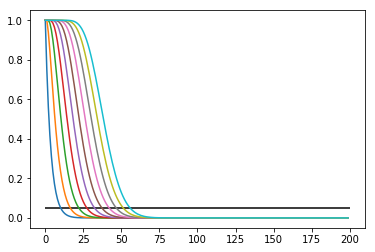

In [3]:
# test criterion
max_N = 200

# number of type I objects in N draws
x = np.array([0,1,2,3,4,5,6,7,8,9])
#x = np.array([0,0,0,0,0,1,1,1,1,1])
x = np.ones(max_N)

# total number of objects
M = np.ones(max_N) * 200
# number of type I objects
n = np.ones(max_N) * 50

# number of draws
N = np.arange(0, max_N)

print(len(N))
print(len(x))

for factor in range(10):
    cdf_array = hypergeom.cdf(factor*x, M, n, N)
    plt.plot(N, cdf_array)

plt.hlines(0.05, 0, min(max_N, M[0]))

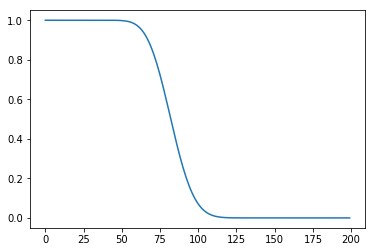

In [8]:
# test criterion
max_N = 200

x = 20*np.ones(max_N)

# total number of objects
M = np.ones(max_N) * 200

# number of draws
N = np.ones(max_N) * 50

# number of type I objects
n = np.arange(0, max_N)

cdf_array = hypergeom.cdf(x, M, n, N)
plt.plot(n, cdf_array)